In [1]:
# let's import various packages that we need
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
import dataset
import random

%matplotlib inline
np.random.seed(1)

In [2]:
# path to training images 
train_path = "../../pimed/pimed_tutorials/python/data/write/rot_images_new_train/"
#data = dataset.read_train_sets(train_path, img_size, classes, validation_size=validation_size)

In [3]:
# function to read data into an array
from PIL import Image
import os
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        A=np.asarray(img)
        images.append(A)
    return images
images = load_images_from_folder(train_path)
images = np.array(images)
# print(len(images[0]))
# filename = os.listdir(train_path)[0]
# img = Image.open(os.path.join(train_path, filename))
# print(img)
# import numpy as np
# A=np.asarray(img)
# print(A.shape)

In [4]:
print(np.shape(images))


(495, 165, 256, 3)


In [23]:
'''
# read the labels
label_path = '../../pimed/pimed_tutorials/python/data/labels/new_lab.txt'
f = open(label_path, "r")
data =[]
for line in f:
    data.append(line)
# to see if read correctly    
'''
for i in data:
    print(i)
'''
x = np.shape(data)[0]
data = np.array(data)
data = data.reshape(x,1)
print(np.shape(data))
'''

NameError: name 'data' is not defined

In [ ]:
# Some test code to may print out a part of what we loaded
## TO-DO: Look into the logic for this

In [ ]:
# Normalize the input data as we read in 8 bit pixel values. We wish to convert them to some number between 0 and 1
# Also encode the angles using one-hot encoding
#X_train, X_test, Y_train, Y_test: X_train and X_test will be 4D tensors with (no. of examples, l,w, channels).
# Y_train and Y_test: 

# uncomment this code later
#print("Shape of X_train: " + str(X_train.shape))
#print("Shape of Y_train: " + str(Y_train.shape))
#print("Shape of X_test: " + str(X_test.shape))
#print("Shape of Y_test: " + str(Y_test.shape))

      

In [5]:
# code that reads labels from a file and converts them to categorical
# training labels
label_path = "../../pimed/pimed_tutorials/python/data/labels/iter_train.txt" # insert path here
num_cat = 5 # for now it's 5 categories
f = open(label_path, "r") # open the file to read
labels=[]
#read all the labels and append them to this list
for line in f:
    labels.append(int(line)) # read as char, need to convert to int

# let's print them out
'''
for i in range(len(labels)):
    print(labels[i])
'''

# let's now convert them to categorical
y = np.zeros((num_cat,len(labels)))

# Logic for one-hot encoding
for i in range(len(labels)):
    if(labels[i]==-30):
        y[0,i] = 1
    elif(labels[i]==-15):
        y[1,i] = 1
    elif(labels[i]==0):
        y[2,i] = 1
    elif(labels[i]==15):
        y[3,i] = 1
    elif(labels[i]==30):
        y[4,i] = 1
y = np.transpose(y)
print(np.shape(y))

(495, 5)


In [6]:
# let's create place holders for variables
def create_placeholders(n_h,n_w,n_c,n_y):
    '''
    create place holders that will be used for building the graph. (X,Y)
    h: height of the image
    w: width of the image
    c: number of channels in the image
    y: number of output classes
    '''
    X = tf.placeholder(tf.float32, shape=(None,n_h,n_w,n_c)) # none is for the batch size and all
    Y = tf.placeholder(tf.float32, shape=(None, n_y))
    return X,Y
    

In [16]:
def init_parameters():
    '''
    Let's first accumulate all the Weights. Pool will be taken care of in the later section
    '''
    W1 = tf.get_variable("W1", [3,3,3,64], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable("W2", [3,3,64,64], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    ## POOL COMES HERE IN THE ARCH
    W3 = tf.get_variable("W3", [3,3,64,128], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W4 = tf.get_variable("W4", [3,3,128,128], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    ''' WIll add these in later
    ## POOL
    W5 = tf.get_variable("W5", [3,3,128,256], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W6 = tf.get_variable("W6", [3,3,256,256], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W7 = tf.get_variable("W7", [3,3,256,256], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    ## POOL
    W8 = tf.get_variable("W8", [3,3,256,512], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W9 = tf.get_variable("W9", [3,3,512,512], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W10 = tf.get_variable("W10", [3,3,512,512], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    ## POOL
    W11 = tf.get_variable("W11", [3,3,512,512], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W12 = tf.get_variable("W12", [3,3,512,512], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W13 = tf.get_variable("W13", [3,3,512,512], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    ## POOL 
    '''
    # create a dictionary
    parameters={"W1":W1, "W2":W2, "W3":W3, "W4":W4}
    return parameters


In [17]:
def forward_prop(X, parameters, n_classes, keep_prob):
    '''
    We passed the input and the dictionary that contains all the parameters
    '''
    # extract parameters from the dictionary
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    W4 = parameters["W4"]
    # Adding batch Norm
    #X = tf.layers.batch_normalization(X, training=True)
    
    # the neural net part
    Z1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME') # same convolutions
    A1 = tf.nn.relu(Z1)
    P1 = A1#tf.nn.max_pool(A1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
    Z2 = tf.nn.conv2d(P1, W2, strides=[1,1,1,1], padding='SAME')
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    P2 = tf.nn.dropout(P2, keep_prob)  # DROP-OUT here
    
    Z3 = tf.nn.conv2d(P2, W3, strides=[1,1,1,1], padding='SAME')
    A3 = tf.nn.relu(Z3)
    P3 = A3#tf.nn.max_pool(A3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
    Z4 = tf.nn.conv2d(P3, W4, strides=[1,1,1,1], padding='SAME')
    A4 = tf.nn.relu(Z4)
    P4 = tf.nn.max_pool(A4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
    # let's now flatten the pool layers
    P4 = tf.contrib.layers.flatten(P4)
    
    # Now connect to fully connected stuff
    Z5 = tf.contrib.layers.fully_connected(P4, n_classes, activation_fn=None)
    return Z5


In [18]:
# code to test if above thing works
tf.reset_default_graph()
with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 5)
    keep_prob = tf.placeholder(tf.float32)
    parameters = init_parameters()
    #keep_probs = tf.placeholder(tf.float32) # probability from dropput
    Z3 = forward_prop(X, parameters, 5, keep_prob)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,5), keep_prob:0.25})
    print("Z3 = " + str(a))
    print(np.shape(Z3))

Z3 = [[-0.3316269   0.18119879 -0.95048463 -1.2105908   0.3677706 ]
 [-0.15386146 -0.12816648 -0.8777418  -0.9120508   0.45201078]]
(?, 5)


In [19]:
# pass NN output and the ground truth
# we will be using the cross entropy loss here
def compute_cost(Z3, Y):
    # applies softmax here
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z3, labels=Y))
    return cost

In [20]:
# Select a particular minibatch
def get_mini_batches(X, Y, minibatch_size, seed):
    np.random.seed(seed)
    indices = np.random.choice(np.shape(X)[0], minibatch_size, replace=False)
    Y_batch = Y[indices,:]
    X_batch = X[indices,:,:,:]
    return X_batch, Y_batch
f,g = get_mini_batches(images, y, 3, 1)
print(np.shape(f))

(3, 165, 256, 3)


In [21]:
#let's build the model now
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.01,
          num_epochs=10, minibatch_size=10, print_cost=True): 
    ''' Implements a three-layer ConvNet in Tensorflow: CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    X_train -- training set, of shape (None, x,y,z)
    Y_train -- test set, of shape (None, n_y = 5) 5 for now
    X_test -- training set, of shape (None, x,y,z)
    Y_test -- test set, of shape (None, n_y = 5)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch

    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    '''

    ops.reset_default_graph() # so that we can run this multiple times. removes some error
    tf.set_random_seed(1)
    seed=3
    (m,n_h,n_w,n_c) = np.shape(X_train) # height, width, number of channels
    n_y = np.shape(Y_train)[1] # number of output classes
    costs=[] # to store all the costs

    #creating place holders
    #X, Y = create_placeholders(n_h,n_w,n_c,n_y)
    X = tf.placeholder(tf.float32, shape=(None,n_h,n_w,n_c))
    Y = tf.placeholder(tf.float32, shape=(None,n_y))
    #initializing parameters
    parameters = init_parameters()
    keep_prob = tf.placeholder(tf.float32)
    #Build computational graph
    Z3 = forward_prop(X, parameters, n_y, keep_prob)
    #Z3 = np.transpose(Z3) #commented out this line
    #A3 = tf.nn.softmax(Z3)
    #extend the graph to compute the graph
    cost = compute_cost(Z3, Y)
    # select an optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    #initialize global variables in the graph
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init) # run this session
        
        for epoch in range(num_epochs):
            
            minibatch_cost=0
            num_minibatches = int(m/minibatch_size)
            seed = seed * 2 + 3 # change seed so that more random samples are picked from data
            
            for minibatch in range(1,num_minibatches):
                minibatch_X, minibatch_Y = get_mini_batches(X_train, Y_train, minibatch_size, seed)
                seed = seed + 1
                # get a mini-batch
                #(minibatch_X, minibatch_Y) = minibatch
                # compute total cost
                _, temp_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y, keep_prob:1})
                minibatch_cost = temp_cost#/num_minibatches
                
                # let's now decide how to print the cost
                if(print_cost==True and epoch%2==0):
                    print("Cost after epoch: %i: %f" %(epoch, minibatch_cost))
                if(print_cost==True):
                    costs.append(minibatch_cost)
        
        # that completes the model part
        plt.plot(np.squeeze(costs)) # convert to array
        plt.ylabel("cost")
        plt.xlabel("iteration (per 10s)")
        plt.title("Learning rate= " + str(learning_rate))
        plt.show()
        
        # let's now use the trained models to make predictions
        predict_op = tf.argmax(Z3,1) #returns index
        ground_th = tf.argmax(Y,1)
        #prediction=tf.argmax(y,1)
        # printing the predictions
        
        print predict_op.eval(feed_dict={X: X_test, keep_prob:1})
        print ground_th.eval(feed_dict={Y: Y_test, keep_prob:1})
        correct_prediction = tf.equal(predict_op, tf.argmax(Y,1))
        
        
        #let's now calculate the cost
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        #print(accuracy)
        train_accuracy =  accuracy.eval({X:X_train, Y:Y_train, keep_prob:1})
        test_accuracy = accuracy.eval({X:X_test, Y:Y_test, keep_prob:1})
        print("Train Accuracy: ", train_accuracy)
        print("Test Accuracy: ", test_accuracy)
        print("Learning rate:", learning_rate)
        print("Number of Epochs:", num_epochs)
        print("Mini-batch Size:", minibatch_size)
        return train_accuracy, test_accuracy, parameters, predict_op
        

In [22]:
#let's test data and see how the network performs
# code that reads labels from a file and converts them to categorical
test_path = "../../pimed/pimed_tutorials/python/data/labels/iter_test.txt" # insert path here
num_cat = 5 # for now it's 5 categories
f = open(test_path, "r") # open the file to read
test_labels=[]
#read all the labels and append them to this list
for line in f:
    test_labels.append(int(line)) # read as char, need to convert to int

# let's print them out
'''
for i in range(len(test_labels)):
    print(test_labels[i])
'''

# let's now convert them to categorical
Y_test = np.zeros((num_cat,len(test_labels)))

#encoding
for i in range(len(test_labels)):
    if(test_labels[i]==-30):
        Y_test[0,i] = 1
    elif(test_labels[i]==-15):
        Y_test[1,i] = 1
    elif(test_labels[i]==0):
        Y_test[2,i] = 1
    elif(test_labels[i]==15):
        Y_test[3,i] = 1
    elif(test_labels[i]==30):
        Y_test[4,i] = 1
Y_test = np.transpose(Y_test)
print(np.shape(Y_test))

(50, 5)


In [23]:
## Let's now read the images
test_im_path = "../../pimed/pimed_tutorials/python/data/write/rot_images_new_test/"
X_test = load_images_from_folder(test_im_path)
X_test = np.array(X_test)
print(np.shape(X_test))

(50, 165, 256, 3)


Cost after epoch: 0: 8.893380
Cost after epoch: 0: 151998.546875
Cost after epoch: 0: 596.103210


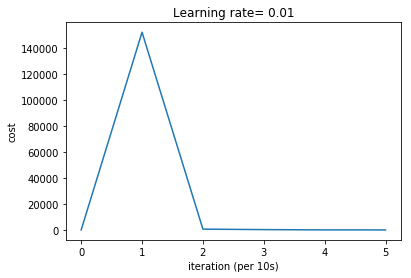

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 2 4 4 4 4 4 4 4 4 4 4]
[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1
 2 3 4 0 1 2 3 4 0 1 2 3 4]


In [ ]:
_, _, parameters, predict_op = model(images, y, X_test, Y_test, learning_rate = 0.01,num_epochs=2, minibatch_size=100)